# Applied Data Science Capstone 
## Assignment 2: Segmenting and Clustering Neighborhoods in Toronto - Part 1


### For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

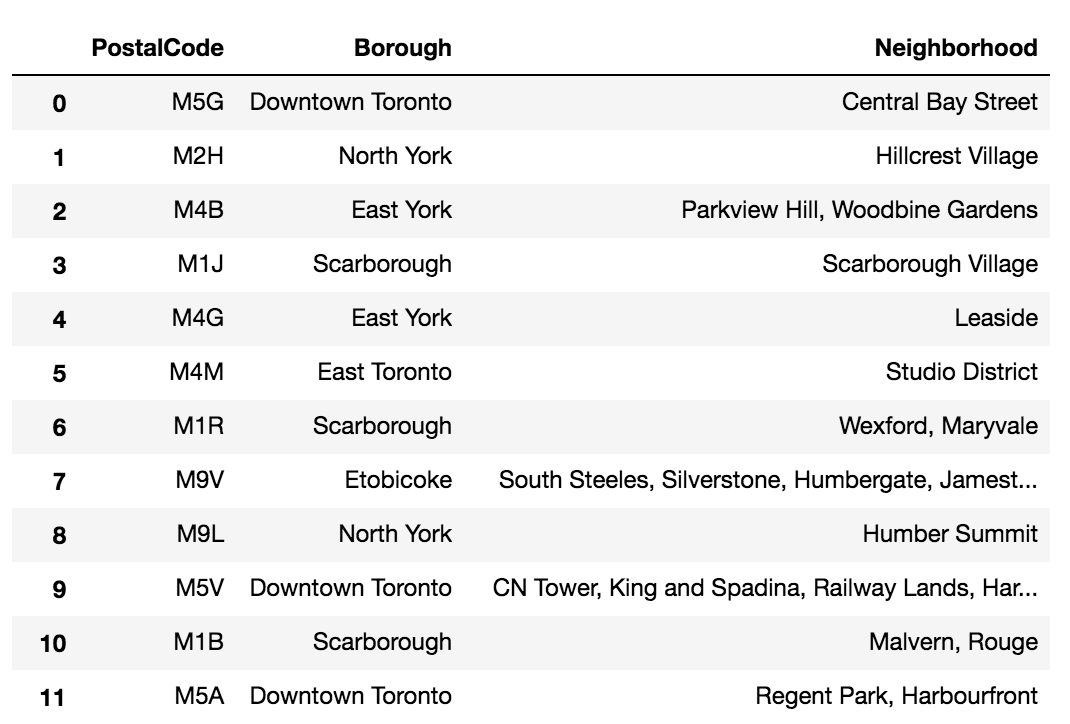


3. To create the above dataframe:

    * The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    * Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    * More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

    * If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
    * Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    * In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
    

In [25]:
# Importing the necessary libraries.
import pandas as pd

### The pandas library has an inbuilt method to read from a URL. Hence, without any scraping libraries, the data can be pulled off from a table in a website easily.

In [32]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

df=pd.read_html(url, header=0)[0]

df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Cleaning the messy string in the Borough column

In [33]:
df = df.replace('\n',' ', regex=True)
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Dropping all cells with a borough that is Not assigned

In [34]:
df.drop(df.index[df['Borough'] == 'Not assigned'], inplace = True)

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

df.head(10)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Queen's Park,Not assigned
6,M9A,Queen's Park,Queen's Park
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


### Combining Neighbourhoods based on similar Postcode and Borough  

In [35]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(','.join).reset_index()
df.columns = ['Postcode','Borough','Neighbourhood']
df.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


### Assigning Borough values to the Neignbourhood where vlaue is "Not assigned"

In [37]:
df.loc[df['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df['Borough']

In [38]:
# Check if the Neighbourhood for Queen's Park changed 
df[df['Borough'] == 'Queen\'s Park']

,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Queen's Park
93,M9A,Queen's Park,Queen's Park


### Save this dataframe to a csv file.

In [40]:
df.to_csv(r'df_can.csv')

### Print the shape of the dataframe.

In [39]:
# Check the shape of the data frame
df.shape

(103, 3)